In [6]:
import matplotlib.pyplot as plt
import numpy             as np
import multiprocessing   as mp

import gym
import Portfolio_Gym
import A2C_III as A2C

In [7]:
def Run (A):
    # Model Parameters.
    np.random.seed(A)
    Retrain_Frequency = 16
    Sigma_Range       = [2, 0.05]
    Sigma_Anneal      = 1

    Gamma  = 0.999

    Actor_Hypers   = {"Learning Rate" : 0.075,
                      "Epoch"         : 1,
                      "Network Size"  : [4,4],
                      "Activation"    : "Sigmoid",
                      "Alpha"         : 0.10}

    Critic_Hypers = {"Learning Rate" : 0.05,
                     "Epoch"         : 10,
                     "Network Size"  : [4,4],
                     "Activation"    : "Sigmoid",
                     "Alpha"         : 0.001}

    Env = gym.make('Historical_Monthly-v0')
    Env.Set_Params(Risk_Aversion = 1,   Episode_Length = 12,   Max_Leverage  = 750,
                   Min_Leverage = -750, Validation_Frac = 0.3, Intermediate_Reward = True)

    myAC = A2C.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, Gamma, Sigma_Range,
                            Sigma_Anneal, Retrain_Frequency)
    myAC.Plot_Frequency = 0  # Dissables plotting (Since this only supports sim env.)

    myAC.Train(100)
    Results = Env.Validate(100, myAC)

    f, ax = plt.subplots(1,1, figsize = (10,10))
    ax.scatter(np.arange(len(Results[0])), Results[0], label = 'DQN', color = 'lightskyblue')
    ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
    ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')
    
    ax.set_title(str(A))
    ax.set_ylabel("Utility")
    ax.set_xlabel("Validation Ep.")
    ax.legend()
    plt.show()

    print("")
    print(str(A) + "      DQN Mean: " +  str(round(np.mean(Results[0]), 4)) + ", Std: " + str(round(np.std(Results[0]), 4))) 
    print(str(A) + "Risk Free Mean: " +  str(round(np.mean(Results[1]), 4)) + ", Std: " + str(round(np.std(Results[1]), 4)))
    print(str(A) + "   Merton Mean: " +  str(round(np.mean(Results[2]), 4)) + ", Std: " + str(round(np.std(Results[2]), 4)))
    print("")




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
  0%|          | 0/100 [00:00<?, ?it/s]/Users/jakefowler/Documents/GitHub/rl-portfolio/A2C Agent/A2C_III.py:127: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-X))
/Users/jakefowler/Documents/GitHub/rl-portfolio/A2C Agent/A2C_

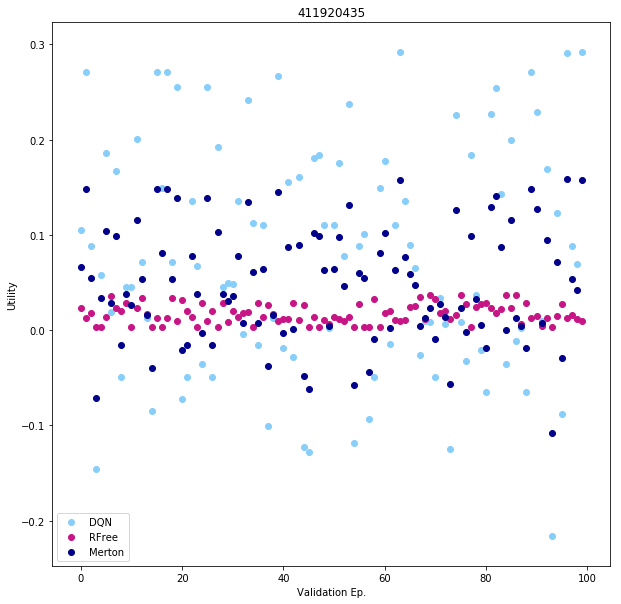

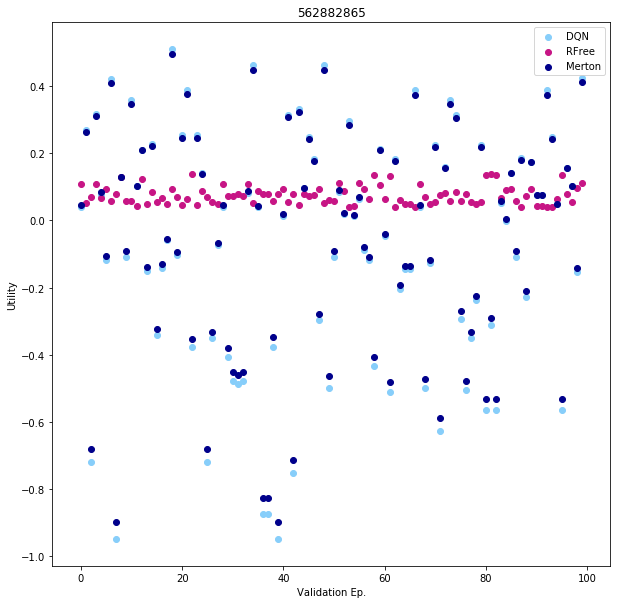



562882865      DQN Mean: -0.0699, Std: 0.3501
411920435      DQN Mean: 0.0752, Std: 0.1195
411920435Risk Free Mean: 0.0171, Std: 0.0098
411920435   Merton Mean: 0.0485, Std: 0.0608

562882865Risk Free Mean: 0.075, Std: 0.0269
562882865   Merton Mean: -0.0608, Std: 0.3337



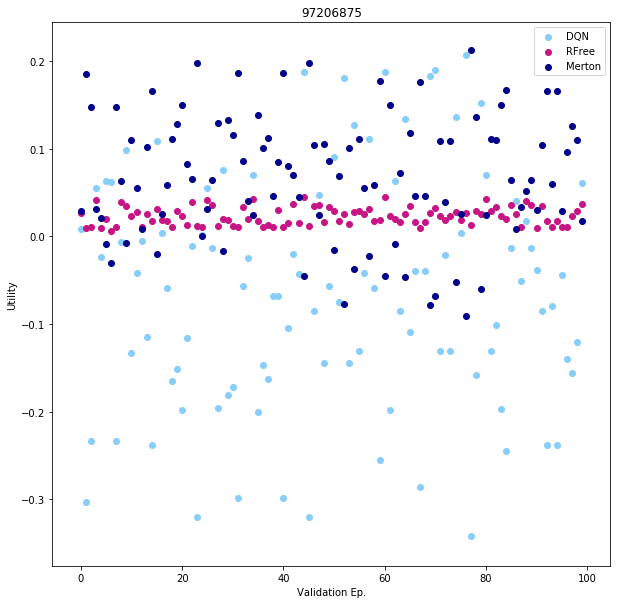


97206875      DQN Mean: -0.0636, Std: 0.1322
97206875Risk Free Mean: 0.0231, Std: 0.0101
97206875   Merton Mean: 0.0684, Std: 0.0714

CPU times: user 133 ms, sys: 91.5 ms, total: 224 ms
Wall time: 11.7 s


In [8]:
%%time

with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))

In [5]:
A = 1 if 3 > 2 else 2